In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# 농어
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
perch_length.shape

(56,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42,) (42,)
(14,) (14,)


In [14]:
# 독립변수(X) 는 2차원으로 변환 해야 한다.
X_train = X_train.reshape(-1, 1) # 열(Column)은 1개로 고정하고, 행(Row)의 개수는 데이터 전체 크기
X_test = X_test.reshape(-1, 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42, 1) (42,)
(14, 1) (14,)


In [26]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [27]:
print(knn.predict([[100]]))

[1033.33333333]


In [28]:
distances, indexes = knn.kneighbors([[50]])
indexes

array([[34,  8, 14]])

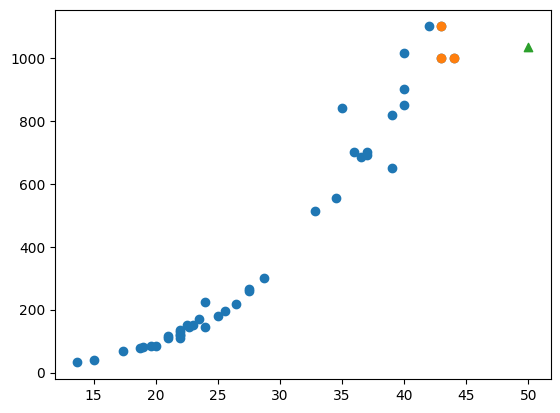

In [20]:
plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes])
plt.scatter(50, knn.predict([[50]]), marker='^')
plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

[3192.69585141]


In [30]:
print(lr.predict([[50]]))

[1241.83860323]


In [31]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


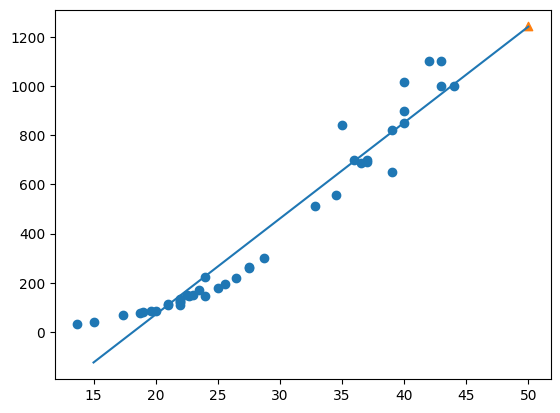

In [37]:
plt.scatter(X_train, y_train)
plt.scatter(50, lr.predict([[50]]), marker="^")
plt.plot([15, 50], [15 * 39 - 709, 50 * 39 - 709]) # [x1, x2], [y1, y2]
plt.show()

In [39]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9398463339976041
0.824750312331356


In [47]:
train_poly = np.column_stack((X_train**2, X_train))
test_poly = np.column_stack((X_test**2, X_test))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [48]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


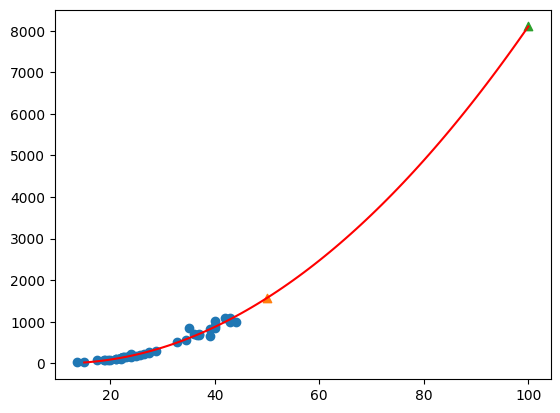

In [61]:
plt.scatter(X_train,y_train)
# 구간별 직선을 그리기 위한 x축 값 생성 (15~50)
point = np.arange(15, 101)
# 2차 방정식 공식 적용: y = a*x^2 + b*x + c
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color='red')
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')
plt.scatter(100, lr.predict([[100**2, 100]]), marker='^')
plt.show()

In [ ]:
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test)) # 0.824 -> 0.977 로 매우 정확도가 올라 감

0.9706807451768623
0.9775935108325122
